# 📚 Unidade 5 - Algoritmos de Aprendizado de Máquina II
![](https://i.imgur.com/GkOFPqU.png)

## 🌟 Visão Geral

Esta unidade é dedicada ao estudo de modelos lineares, focando-se especificamente em regressão linear e logística. Após explorar métodos não paramétricos e estruturas de decisão na Unidade 4, agora avançaremos para técnicas que envolvem a estimativa de parâmetros para modelagem preditiva. Os destaques incluem:

- **📈 Regressão Linear**: Esta técnica estatística é usada para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes, assumindo uma relação linear. É fundamental para previsões contínuas e análise de tendências.
  
- **🔄 Regressão Logística**: Diferentemente da regressão linear que prevê valores contínuos, a regressão logística é usada para casos de classificação binária. Por exemplo, prever se um email é spam ou não.

Esta unidade é crucial para entender como os modelos lineares são ajustados aos dados e como podem ser utilizados para fazer previsões precisas em problemas tanto de regressão quanto de classificação. Utilizaremos Python e suas bibliotecas como Scikit-Learn para implementar e analisar esses modelos de forma prática.


### 🔍 Diferenças Chave em Relação à Unidade 4

Enquanto a Unidade 4 focou em algoritmos de aprendizado de máquina que não assumem uma forma funcional fixa para a relação entre variáveis independentes e dependentes (como kNN e Árvores de Decisão), a Unidade 5 se concentra em técnicas que modelam explicitamente essa relação através de **equações lineares**. Isso introduz uma abordagem mais estruturada para a análise preditiva, que é essencial para casos em que a relação entre as variáveis é bem compreendida e pode ser aproximada por linhas retas ou curvas logísticas.


![](https://imgur.com/dSVECj6.png)


# Regressão Linear com o Dataset Ames Housing

Este notebook fornece um exemplo prático de como aplicar regressão linear usando o dataset [Ames Housing](https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset). Vamos passar por todas as etapas desde a importação dos dados até o treinamento e avaliação do modelo de regressão linear.


## 📚 Importação de Bibliotecas Essenciais

Antes de começarmos, precisamos importar algumas bibliotecas essenciais que nos ajudarão na análise e modelagem dos dados.


In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error, r2_score, accuracy_score, confusion_matrix

import seaborn as sns
sns.set(style='whitegrid')

- **numpy(`numpy`):** Usado para suporte de arrays e matrizes multidimensionais, [numpy](https://numpy.org/) juntamente com uma coleção de funções matemáticas para operar com estas estruturas. É a base para quase todos os cálculos numéricos em Python, especialmente em ciência de dados e machine learning.
- **Pandas (`pandas`)**: Essencial para manipulação e análise de dados de forma eficiente e simples.
- **Matplotlib (`matplotlib.pyplot`)**: Biblioteca de plotagem que nos permite criar uma ampla variedade de figuras e gráficos estáticos, animados ou interativos.
- **Seaborn (`seaborn`)**: Baseada no Matplotlib, essa biblioteca proporciona uma interface de alto nível para desenhar gráficos estatísticos atrativos e informativos.
- **Scikit-learn (`sklearn`)**: Ferramenta simples e eficiente para análise preditiva de dados, trazendo implementações de vários algoritmos de machine learning, como regressão linear e logística, além de métodos para dividir dados, avaliar modelos e muito mais.
- **sns.set(style='whitegrid')**: O comando é usado para definir o tema visual global dos gráficos criados com Seaborn. A opção `style='whitegrid'` aplica um fundo branco com linhas de grade cinzas aos gráficos, proporcionando uma apresentação limpa e distinta que facilita a análise visual dos dados.

## 📂 Carregando o Dataset


O dataset Ames Housing contém informações sobre propriedades residenciais vendidas na cidade de Ames, Iowa, de 2006 a 2010. Inclui 2930 observações e um grande número de explicativas (ou "features") potencialmente preditivas.



In [ ]:
# Você pode carregar o dataset diretamente usando pandas
url = 'https://drive.google.com/uc?export=download&id=1JjHy6kD9pMRXBD7Nl44Rhi6DC5q9h_3x'
ames_df = pd.read_csv(url)
ames_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900



### 📊 Visualização da Distribuição do Dataset

Vamos visualizar a distribuição do preço de venda, que é nossa variável alvo.


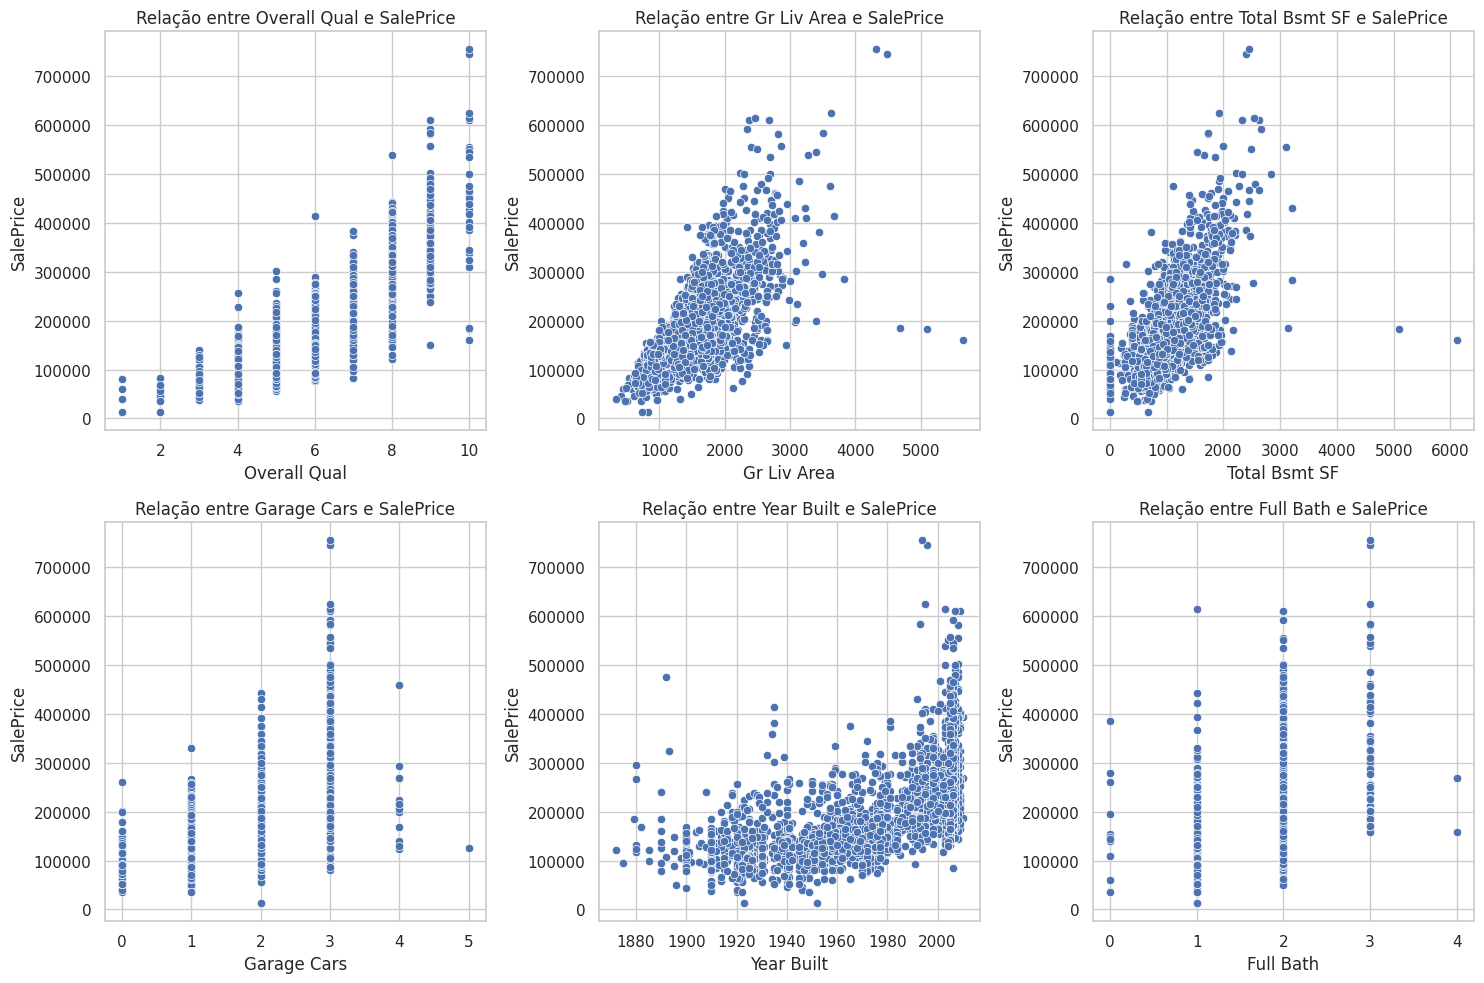

In [ ]:
columns_to_plot = ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', 'Year Built', 'Full Bath','SalePrice']
ames_df_selected = ames_df[columns_to_plot].dropna()

# Criar scatter plots para cada uma das características selecionadas
plt.figure(figsize=(15, 10))
for i, column in enumerate(ames_df_selected.columns[:-1], 1):  # Exclui 'SalePrice' da iteração
    plt.subplot(2, 3, i)  # Ajuste o layout conforme necessário
    sns.scatterplot(data=ames_df_selected, x=column, y='SalePrice')
    plt.title(f'Relação entre {column} e SalePrice')
    plt.xlabel(column)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


### 🛠️ Divisão de Dados e Treinamento


#### 🔄 Divisão dos Dados

Agora vamos dividir o dataset em um conjunto de treinamento e um conjunto de teste. Usaremos 80% dos dados para treinamento e 20% para teste.


In [ ]:
# Selecionar apenas colunas numéricas e limpar dados
ames_df_numeric = ames_df.select_dtypes(include=[np.number]).dropna(axis=1)
X_ames = ames_df_numeric.drop('SalePrice', axis=1)
y_ames = ames_df_numeric['SalePrice']

# Dividir os dados em treino e teste
X_train_ames, X_test_ames, y_train_ames, y_test_ames = train_test_split(X_ames, y_ames, test_size=0.2, random_state=42)

#### 🏋️‍♂️ Treinamento do Modelo

Com os dados divididos, podemos treinar nosso modelo de regressão linear.


In [ ]:
# Criando o objeto de regressão linear
model = LinearRegression()
# Treinando o modelo
model.fit(X_train_ames, y_train_ames)


LinearRegression()

#### 📏 Avaliação do Modelo

Vamos calcular o RMSE e o R² para avaliar o desempenho do nosso modelo. Também vamos visualizar como as previsões se comparam com os valores reais.

RMSE: 39114.36
R²: 0.81


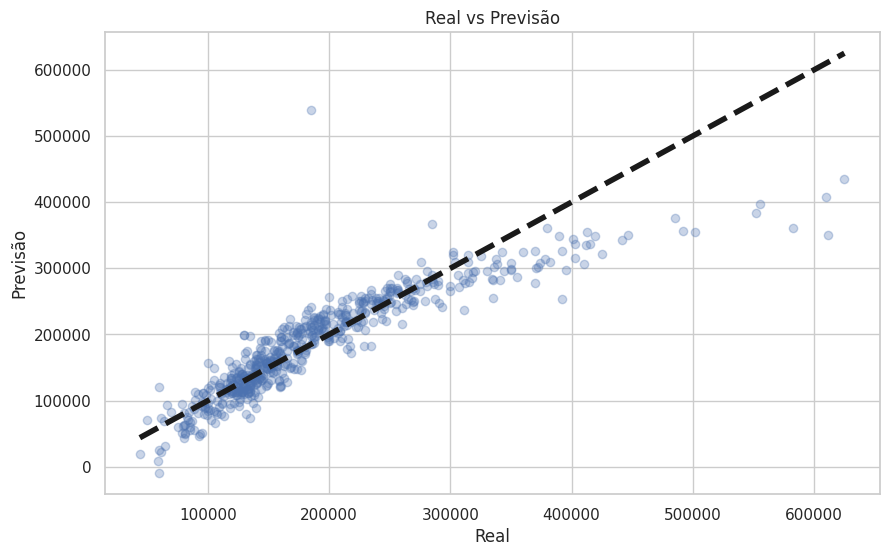

In [ ]:
y_pred_ames = model.predict(X_test_ames)
mse_ames = mean_squared_error(y_test_ames, y_pred_ames)
r2_ames = r2_score(y_test_ames, y_pred_ames)

print(f'RMSE: {mse_ames ** 0.5:.2f}')
print(f'R²: {r2_ames:.2f}')

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ames, y_pred_ames, alpha=0.3)
plt.plot([y_test_ames.min(), y_test_ames.max()], [y_test_ames.min(), y_test_ames.max()], 'k--', lw=4)
plt.xlabel('Real')
plt.ylabel('Previsão')
plt.title('Real vs Previsão')
plt.show()


📈 **Interpretação**: Um RMSE menor e um R² mais próximo de 1.0 indicam um modelo de melhor desempenho, significando que ele pode prever com precisão a progressão da diabetes a partir dos dados fornecidos.


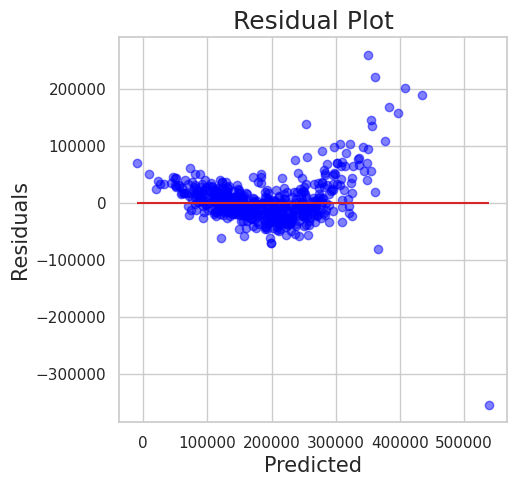

In [ ]:
residuals = y_test_ames - y_pred_ames
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(y_pred_ames, residuals, alpha=0.5, color='blue')
ax.hlines(0, xmin=y_pred_ames.min(), xmax=y_pred_ames.max(), color='tab:red')  # Linha horizontal em y=0

plt.xlabel('Predicted', size=15)
plt.ylabel('Residuals', size=15)
plt.title('Residual Plot', size=18)
plt.grid(True)
plt.show()

## 🔚 Conclusão sobre Regressão Linear 📏

Nesta aula, exploramos profundamente o método de Regressão Linear, uma técnica essencial no aprendizado supervisionado que é amplamente utilizada para modelar relações lineares entre variáveis. Vamos destacar os pontos-chave e os desafios associados ao uso da Regressão Linear:

#### 🚀 Pontos-Chave
- **Simplicidade e Eficiência:** A regressão linear é fácil de entender e implementar, o que a torna ideal para problemas onde a relação entre variáveis é presumivelmente linear.
- **Interpretabilidade dos Resultados:** Os coeficientes de regressão podem ser diretamente interpretados como o efeito de uma unidade de mudança em uma variável independente sobre a variável dependente, mantendo todas as outras constantes.

#### ❗ Desafios
- **Limitação a Relações Lineares 📉:** A principal limitação da regressão linear é que ela só pode modelar relações lineares, o que pode não ser suficiente para capturar a complexidade de alguns conjuntos de dados reais.
- **Suscetibilidade a Outliers 🎯:** A regressão linear pode ser excessivamente sensível a outliers, o que pode distorcer significativamente a relação percebida e afetar a precisão das previsões.

#### 📊 Considerações Finais
A regressão linear serve como uma ferramenta poderosa e de partida para análise preditiva, especialmente em cenários onde a relação entre variáveis é bem compreendida e linear. Para superar algumas de suas limitações, recomenda-se explorar técnicas adicionais como transformações de variáveis, métodos de seleção e regularização de variáveis, e até mesmo considerar modelos mais complexos se a linearidade não for adequada. Continuem a explorar e ajustar seus modelos para alcançar o melhor desempenho possível! 🌟


# 📊 Introdução à Regressão Logística com o Dataset Breast Cancer

Nesta seção, vamos explorar a regressão logística utilizando o dataset 'Breast Cancer'. A regressão logística é amplamente usada para modelar a probabilidade de uma classe ou evento existente, como o diagnóstico de câncer sendo benigno ou maligno. Vamos usar este modelo para prever se uma amostra de câncer de mama é benigna (0) ou maligna (1) com base em características da célula do tumor.

## 📂 Carregando o Dataset Breast Cancer

O dataset 'Breast Cancer' contém características de imagens digitais de biópsia de tecido mamário, com rótulos indicando se as células são benignas ou malignas.

In [ ]:
# Carregando o dataset Breast Cancer
breast_cancer = load_breast_cancer()
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_breast_cancer['target'] = breast_cancer.target
# Exibindo as primeiras linhas
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



### 🔍 Análise Exploratória de Dados

Antes de modelar, é útil realizar uma análise exploratória para entender melhor as características e a distribuição dos dados.

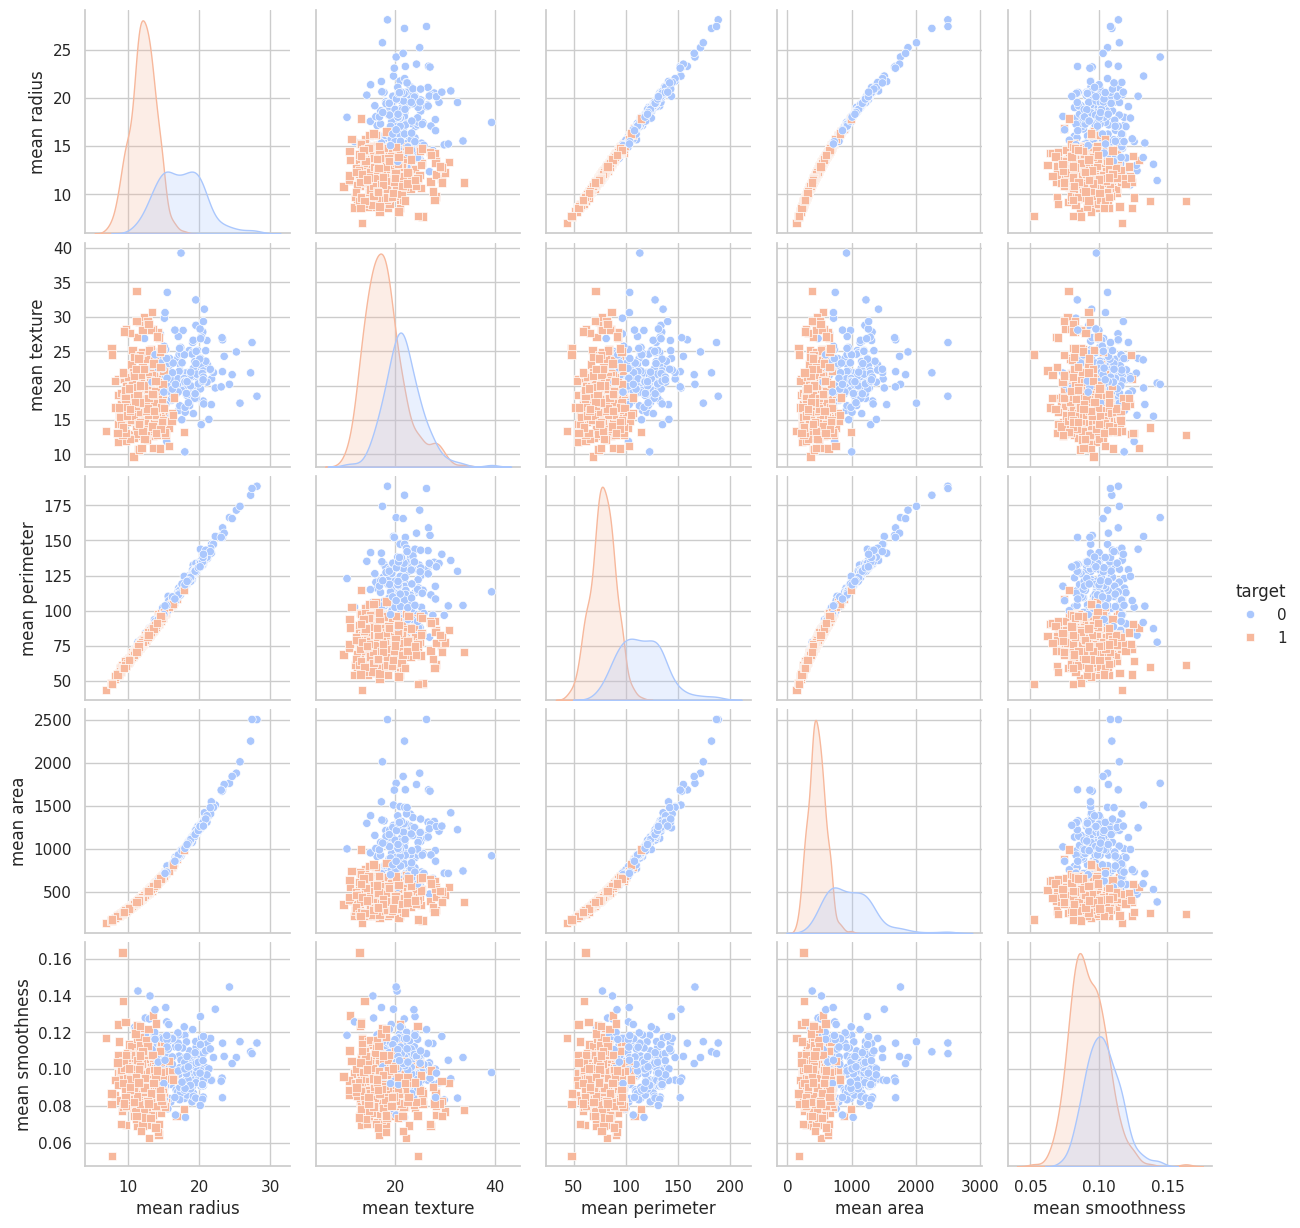

In [ ]:
# Selecionando um subconjunto das características para melhor visualização
# Vamos pegar as primeiras 5 características para o exemplo
features_subset = breast_cancer.feature_names[:5]
df_subset = df_breast_cancer[features_subset.tolist() + ['target']]

# Usando pairplot para visualizar as relações entre características
sns.pairplot(df_subset, hue='target', palette='coolwarm', markers=["o", "s"])
plt.show()

## 🛠️ Preparação dos Dados e Divisão

É fundamental preparar os dados adequadamente, dividindo-os em conjuntos de treinamento e teste.

In [ ]:
# Dividindo os dados
X = df_breast_cancer.drop('target', axis=1)
y = df_breast_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🏋️‍♂️ Treinamento do Modelo de Regressão Logística

In [ ]:
# Criando e treinando o modelo
modelo_logistico = LogisticRegression(max_iter=10000)
modelo_logistico.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### 📏 Avaliação do Modelo

Avaliamos o modelo utilizando a acurácia e a matriz de confusão.


              precision    recall  f1-score   support

     maligno       0.97      0.91      0.94        43
     benigno       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



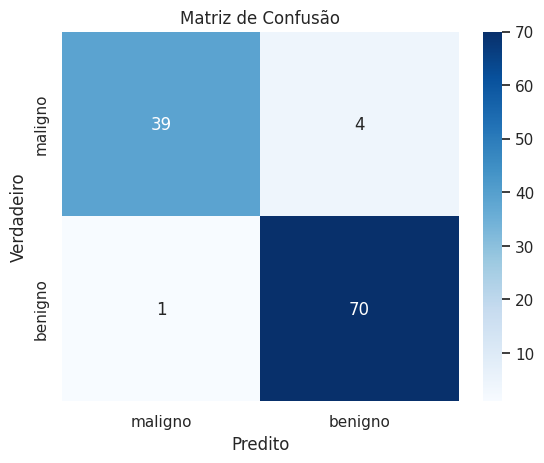

In [ ]:
# Avaliando o modelo
y_pred = modelo_logistico.predict(X_test)

target_names = ['maligno', 'benigno']

# Gerando o relatório de classificação
print(classification_report(y_test, y_pred, target_names=target_names))

# Criando a matriz de confusão
conf_mat = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão com Seaborn
sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

## 🔚 Conclusão sobre Regressão Logística 📏

Nesta aula introdutória, abordamos a Regressão Logística, uma técnica fundamental no aprendizado supervisionado para problemas de classificação. Ela é especialmente útil para prever resultados binários, como diagnósticos médicos ou aprovação de crédito.

#### 🚀 Pontos-Chave
- **Eficiência em Classificação:** Ideal para categorizar resultados claramente definidos.
- **Probabilidades Modeladas:** Fornece as probabilidades das previsões, útil para tomada de decisões.

#### ❗ Desafios
- **Linearidade:** Assume que as classes podem ser separadas linearmente.
- **Desbalanceamento de Classes:** Pode ser afetada por classes desproporcionais, exigindo técnicas de ajuste.

#### 📊 Considerações Finais
A regressão logística é eficaz e proporciona uma boa base para análise preditiva. Recomenda-se explorar pré-processamento e balanceamento para melhorar seu desempenho. Continue ajustando e experimentando para aprimorar suas habilidades em modelagem! 🌟